# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import statistics as st
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import cv2
import random
from tqdm import tqdm, trange
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.semi_supervised import LabelSpreading, LabelPropagation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_train=pd.read_csv("/content/drive/MyDrive/Deep Learning/data/Train.csv")
df_train['Path']=df_train.Path.apply(lambda x: "/content/drive/MyDrive/Deep Learning/data/"+x) ## change and normalize path
df_train['ClassId']=df_train.ClassId.astype(str)

df_test=pd.read_csv("/content/drive/MyDrive/Deep Learning/data/Test.csv")
df_test['Path']=df_test.Path.apply(lambda x: "/content/drive/MyDrive/Deep Learning/data/"+x) ## change and normalize path
df_test['ClassId']=df_test.ClassId.astype(str)

In [4]:
x_train=np.load("/content/drive/MyDrive/Deep Learning/df_im.npy")
x_test=np.load("/content/drive/MyDrive/Deep Learning/df_im_test.npy")
y_train=df_train['ClassId']
y_test=df_test['ClassId']
y_test=y_test.astype(int)

In [5]:
assert x_train.shape==(39209, 3072)
assert x_test.shape==(12630, 3072)
assert y_train.shape == (39209,)
assert y_test.shape == (12630,)

In [6]:
x_train_lab, x_test_unlab, y_train_lab, y_test_unlab = train_test_split(x_train, y_train, test_size=0.8, random_state=1, stratify=y_train)

In [7]:
knn=KNeighborsClassifier()
knn.fit(x_train_lab, y_train_lab)

KNeighborsClassifier()

In [8]:
knn.predict(x_test)

array(['1', '15', '36', ..., '3', '16', '10'], dtype=object)

In [9]:
knn.score(x_test_unlab,y_test_unlab)

0.6591430757459832

# Label spreading

In [10]:
x_train_mixed = np.concatenate((x_train_lab, x_test_unlab))

In [11]:
pd.DataFrame(x_train_mixed)

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,57,67,57,66,73,74,51,71,78,43,...,24,36,34,30,41,39,35,45,49,45
1,49,110,174,50,111,173,51,111,171,50,...,21,23,28,24,25,31,31,26,34,38
2,255,255,255,255,255,255,255,255,255,255,...,59,71,58,55,69,53,48,57,46,41
3,45,42,44,44,41,43,41,37,38,40,...,64,85,73,63,83,73,65,83,74,66
4,23,28,35,20,23,30,24,27,34,21,...,27,18,22,28,17,20,23,21,25,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39204,53,53,51,46,46,42,50,47,45,52,...,255,255,255,255,255,255,255,255,255,255
39205,18,18,28,15,16,22,15,15,18,15,...,15,27,20,17,28,20,16,35,25,19
39206,51,61,71,50,59,79,45,53,58,51,...,57,49,58,69,50,57,69,49,54,63
39207,56,61,66,73,65,71,172,127,130,254,...,78,76,82,85,68,75,74,75,82,87


In [12]:
nolabel = [-1 for _ in range(len(y_test_unlab))]
y_train_mixed = np.concatenate((y_train_lab, nolabel))
y_train_mixed=y_train_mixed.astype(int)

In [13]:
model = LabelSpreading(kernel='knn',n_neighbors=2)
model.fit(x_train_mixed, y_train_mixed)

LabelSpreading(kernel='knn', n_neighbors=2)

In [14]:
y_pred=model.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.01      0.62      0.01        60
           1       0.29      0.21      0.24       720
           2       0.28      0.15      0.19       750
           3       0.11      0.10      0.11       450
           4       0.27      0.20      0.23       660
           5       0.20      0.19      0.20       630
           6       0.49      0.22      0.30       150
           7       0.20      0.19      0.19       450
           8       0.27      0.15      0.19       450
           9       0.50      0.21      0.30       480
          10       0.48      0.34      0.40       660
          11       0.69      0.22      0.34       420
          12       0.66      0.30      0.41       690
          13       0.74      0.50      0.60       720
          14       0.92      0.26      0.40       270
          15       0.27      0.14      0.18       210
          16       0.59      0.51      0.55       150
          17       0.94    

In [16]:
y_test=pd.DataFrame(y_test,columns=['ClassId'])
y_test['ClassId']=y_test['ClassId'].astype(int)
y_pred=pd.DataFrame(y_pred,columns=['ClassId'])
y_pred['ClassId']=y_pred['ClassId'].astype(int)
abs(y_pred-y_test).value_counts()/len(y_test)

ClassId
0          0.230483
1          0.083294
2          0.062154
4          0.053998
5          0.047743
3          0.045922
13         0.034521
6          0.031354
7          0.031116
8          0.030325
10         0.029612
12         0.026049
11         0.024386
25         0.022724
9          0.022486
38         0.021853
31         0.014885
14         0.013143
18         0.012906
35         0.011956
15         0.011560
17         0.010610
26         0.010451
22         0.009501
16         0.009264
36         0.008947
33         0.007522
20         0.007047
23         0.006809
24         0.006730
34         0.006492
19         0.006413
28         0.006097
29         0.006017
21         0.005859
30         0.005384
27         0.004909
37         0.004355
39         0.003959
40         0.003246
32         0.003009
42         0.002930
41         0.001979
dtype: float64

In [17]:
x_train=np.load("/content/drive/MyDrive/Deep Learning/df_im.npy")
x_test=np.load("/content/drive/MyDrive/Deep Learning/df_im_test.npy")
y_train=df_train['ClassId']
y_test=df_test['ClassId']
y_test=y_test.astype(int)

accuracies_k2=[]
for i in trange(1,10):

  x_train_lab, x_test_unlab, y_train_lab, y_test_unlab = train_test_split(x_train, y_train, test_size=i/10, random_state=1, stratify=y_train)
  print(i/100)
  x_train_mixed = np.concatenate((x_train_lab, x_test_unlab))
  nolabel = [-1 for _ in range(len(y_test_unlab))]
  y_train_mixed = np.concatenate((y_train_lab, nolabel))
  y_train_mixed=y_train_mixed.astype(int)

  model = LabelSpreading(kernel='knn',n_neighbors=2)
  model.fit(x_train_mixed, y_train_mixed)

  y_pred=model.predict(x_test)

  y_test=pd.DataFrame(y_test,columns=['ClassId'])
  y_test['ClassId']=y_test['ClassId'].astype(int)
  y_pred=pd.DataFrame(y_pred,columns=['ClassId'])
  y_pred['ClassId']=y_pred['ClassId'].astype(int)
  a=abs(y_pred-y_test).value_counts()/len(y_test)
  accuracies_k2.append(a[0])

x_train=np.load("/content/drive/MyDrive/Deep Learning/df_im.npy")
x_test=np.load("/content/drive/MyDrive/Deep Learning/df_im_test.npy")
y_train=df_train['ClassId']
y_test=df_test['ClassId']
y_test=y_test.astype(int)

accuracies_k10=[]
for i in trange(1,10):

  x_train_lab, x_test_unlab, y_train_lab, y_test_unlab = train_test_split(x_train, y_train, test_size=i/10, random_state=1, stratify=y_train)
  print(i/100)
  x_train_mixed = np.concatenate((x_train_lab, x_test_unlab))
  nolabel = [-1 for _ in range(len(y_test_unlab))]
  y_train_mixed = np.concatenate((y_train_lab, nolabel))
  y_train_mixed=y_train_mixed.astype(int)

  model = LabelSpreading(kernel='knn',n_neighbors=10)
  model.fit(x_train_mixed, y_train_mixed)

  y_pred=model.predict(x_test)

  y_test=pd.DataFrame(y_test,columns=['ClassId'])
  y_test['ClassId']=y_test['ClassId'].astype(int)
  y_pred=pd.DataFrame(y_pred,columns=['ClassId'])
  y_pred['ClassId']=y_pred['ClassId'].astype(int)
  a=abs(y_pred-y_test).value_counts()/len(y_test)
  accuracies_k10.append(a[0])


  0%|          | 0/9 [00:00<?, ?it/s]

0.01


/usr/local/lib/python3.8/dist-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
 11%|█         | 1/9 [06:46<54:13, 406.64s/it]

0.02


/usr/local/lib/python3.8/dist-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
 22%|██▏       | 2/9 [13:29<47:12, 404.70s/it]

0.03


/usr/local/lib/python3.8/dist-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
 33%|███▎      | 3/9 [20:11<40:19, 403.31s/it]

0.04


/usr/local/lib/python3.8/dist-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
 44%|████▍     | 4/9 [26:55<33:37, 403.46s/it]

0.05


/usr/local/lib/python3.8/dist-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
 56%|█████▌    | 5/9 [33:40<26:55, 403.94s/it]

0.06


/usr/local/lib/python3.8/dist-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
 67%|██████▋   | 6/9 [40:21<20:09, 403.20s/it]

0.07


/usr/local/lib/python3.8/dist-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
 78%|███████▊  | 7/9 [47:04<13:26, 403.10s/it]

0.08


/usr/local/lib/python3.8/dist-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
 89%|████████▉ | 8/9 [53:45<06:42, 402.38s/it]

0.09


/usr/local/lib/python3.8/dist-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
  0%|          | 0/9 [00:00<?, ?it/s]

0.01


 11%|█         | 1/9 [07:00<56:06, 420.75s/it]

0.02


 22%|██▏       | 2/9 [13:56<48:45, 417.90s/it]

0.03


 33%|███▎      | 3/9 [20:49<41:32, 415.44s/it]

0.04


 44%|████▍     | 4/9 [27:48<34:44, 416.99s/it]

0.05


 56%|█████▌    | 5/9 [34:52<27:57, 419.45s/it]

0.06


 67%|██████▋   | 6/9 [41:50<20:57, 419.14s/it]

0.07


 78%|███████▊  | 7/9 [48:47<13:56, 418.19s/it]

0.08


 89%|████████▉ | 8/9 [55:48<06:59, 419.06s/it]

0.09


/usr/local/lib/python3.8/dist-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
100%|██████████| 9/9 [1:02:45<00:00, 418.42s/it]


Text(0.5, 1.0, 'Accuracy depending on the non-labelled data size (k=2)')

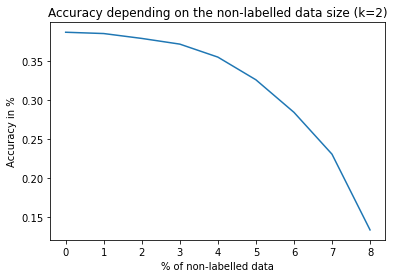

In [18]:
plt.plot(accuracies_k2)
plt.xlabel('% of non-labelled data')
plt.ylabel('Accuracy in %')
plt.title('Accuracy depending on the non-labelled data size (k=2)')

Text(0.5, 1.0, 'Accuracy depending on the non-labelled data size (k=10)')

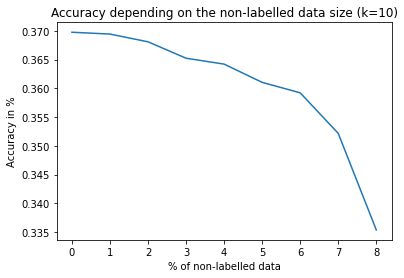

In [19]:
plt.plot(accuracies_k10)
plt.xlabel('% of non-labelled data')
plt.ylabel('Accuracy in %')
plt.title('Accuracy depending on the non-labelled data size (k=10)')